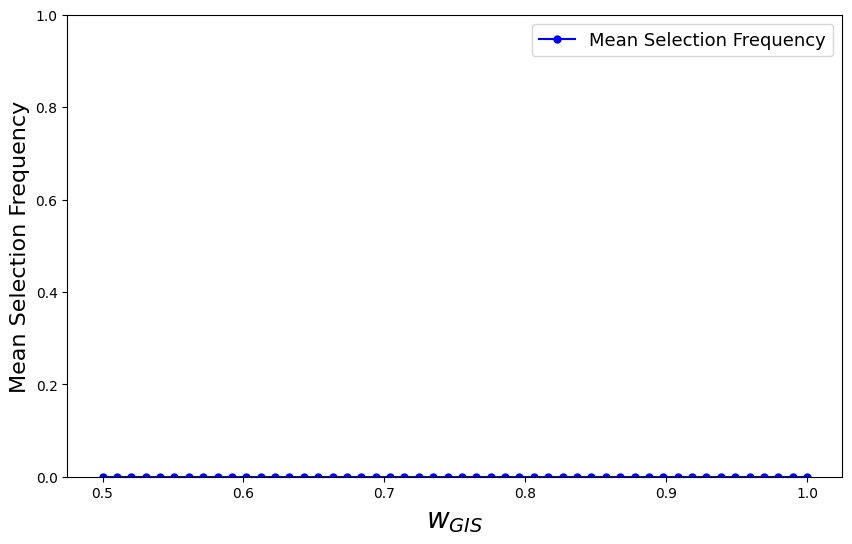

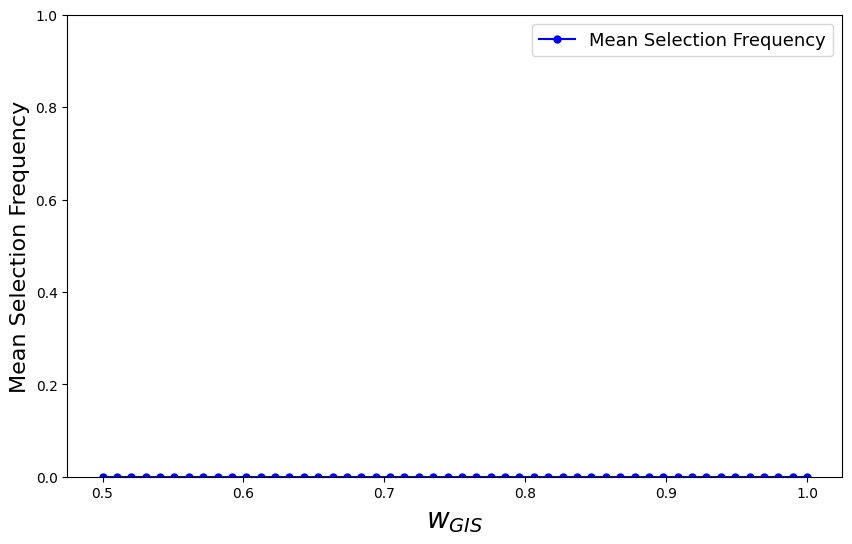

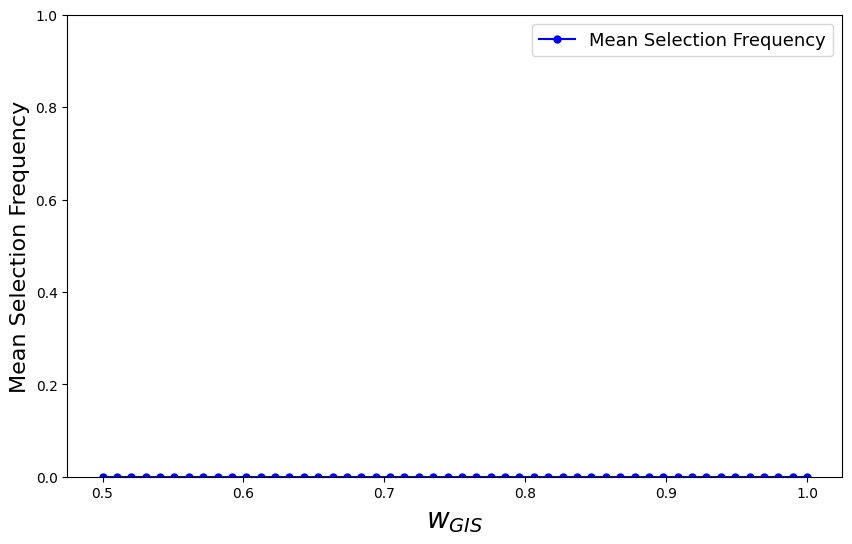

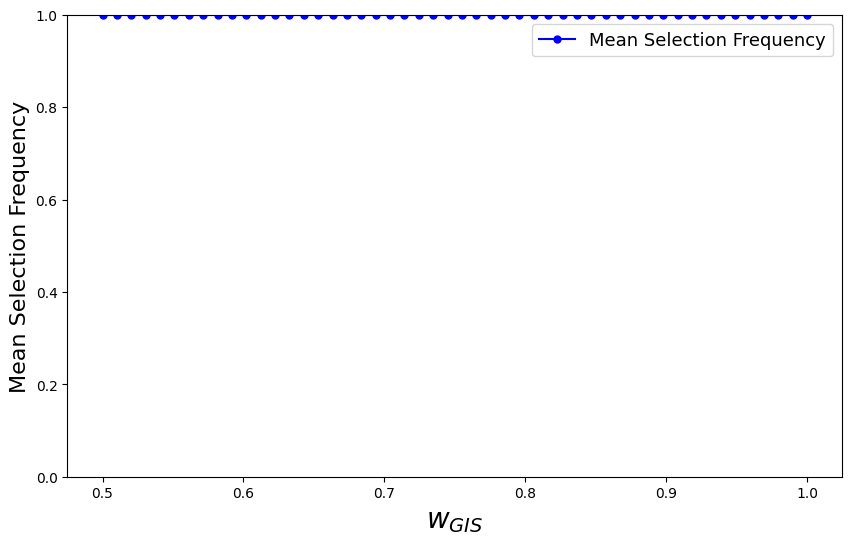

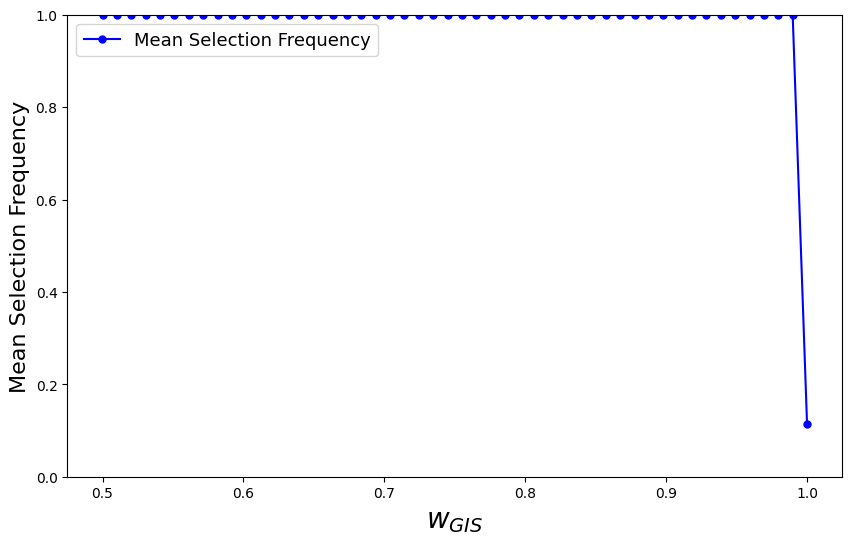

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import os
from collections import defaultdict

dire = "/home/mongardi/tree-based-models/prior_tree_models_repo"
dire_results = os.path.join(dire, 'src/sensitivity_analysis/sens_an_II2/plots')
if not os.path.exists(dire_results):
    os.makedirs(dire_results)

target_genes = ['ZNF561', 'ANKRD13D', 'VEGFB', 'ABCA4', 'PPAPDC1A']


file_path = os.path.join(dire,'src/sensitivity_analysis/sens_an_II2/ss_II_v_1.txt')


def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')


score_counts = {gene: defaultdict(list) for gene in target_genes}

run_counts = {gene: 0 for gene in target_genes}  
with open(file_path, 'r') as file:
    for line in file:

        match = re.match(r"(\w+) : ([0-9.]+) -> Index\((\[.*\])", line)
        if match:
            gene_name, gis_score, choices = match.groups()
            gis_score = float(gis_score)
            choices_list = eval(choices)  # Convert choices to a list
            
            if gene_name in target_genes and run_counts[gene_name] <= 5:
                selected = 1 if gene_name in choices_list else 0
                score_counts[gene_name][gis_score].append(selected)

for gene in target_genes:
    scores = sorted(score_counts[gene].keys())
    mean_values = [np.mean(score_counts[gene][score]) for score in scores]
    #print(mean_values)

    # Plotting

    plt.figure(figsize=(10, 6))
    plt.plot(scores, mean_values, marker='o', linestyle='-', color='blue', markersize=5, label='Mean Selection Frequency')
    plt.ylim(0, 1)
    plt.ylabel("Mean Selection Frequency", fontsize=16)
    plt.xlabel(r"$w_{GIS}$", fontsize=20)
    plt.legend(fontsize=13)
    #plt.show()
    plt.savefig(os.path.join(dire_results,f"{gene}.pdf"), format='pdf', bbox_inches='tight',pad_inches = 0, dpi=1200)

    
